# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.



LDA Topics:
Topic 0: god, people, think, just, like, say, know, jesus, does, did
Topic 1: 00, 10, health, use, period, 1993, 20, tobacco, play, new
Topic 2: good, 50, year, excellent, vs, day, car, just, win, gun
Topic 3: people, com, edu, know, don, like, said, list, just, dod
Topic 4: mr, encryption, government, key, president, new, use, time, chip, don
Topic 5: don, just, like, people, think, does, good, time, know, problem
Topic 6: ax, max, g9v, a86, b8f, pl, 1t, bhj, 1d9, giz
Topic 7: drive, windows, use, window, thanks, like, using, does, pc, know
Topic 8: water, new, know, don, like, does, just, church, engine, catholic
Topic 9: entry, armenian, armenians, entries, program, use, 10, section, year, number

LSA Topics:
Topic 0: don, people, know, like, just, think, does, use, time, good
Topic 1: windows, thanks, files, hi, dos, advance, card, pc, drive, file
Topic 2: pitt, geb, surrender, cadre, chastity, dsl, n3jxp, skepticism, intellect, shameful
Topic 3: god, does, know, jesus

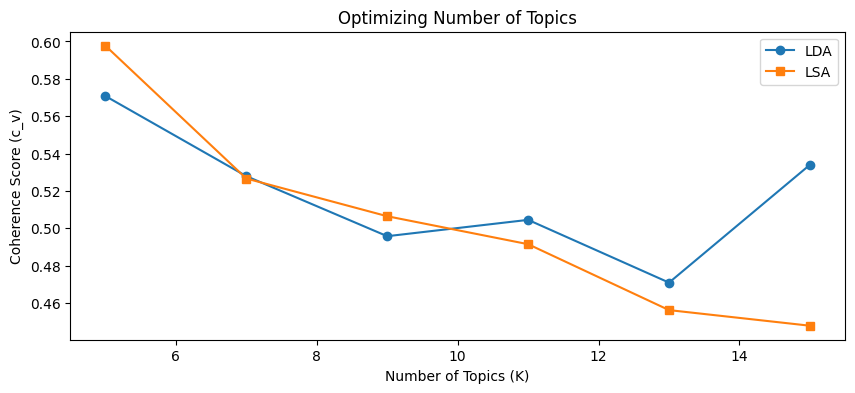


Visualizing LDA topics with WordClouds:


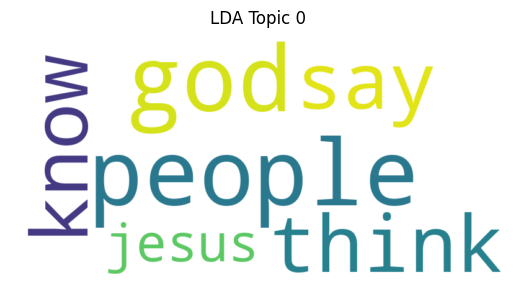

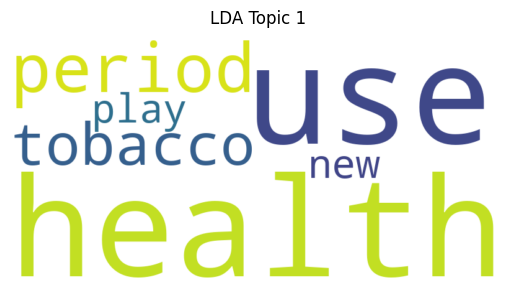

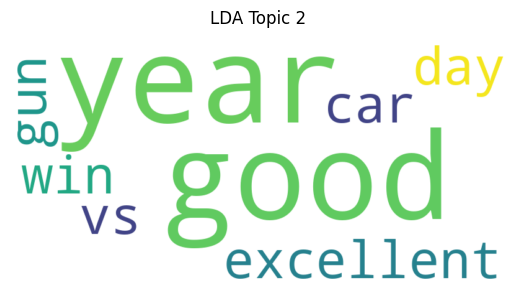

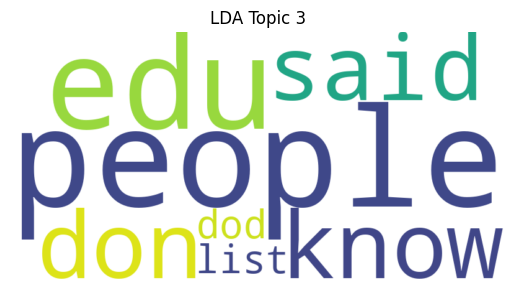

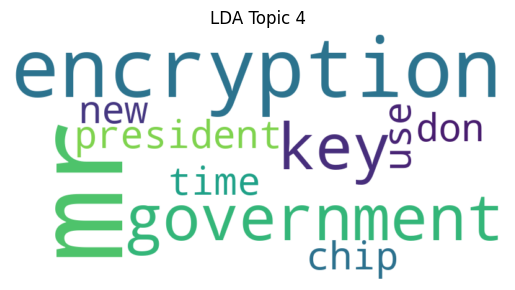

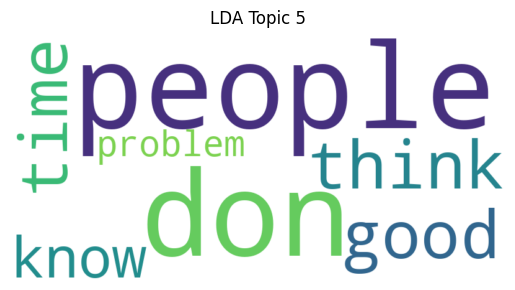

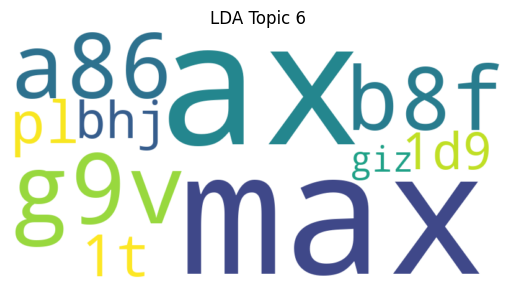

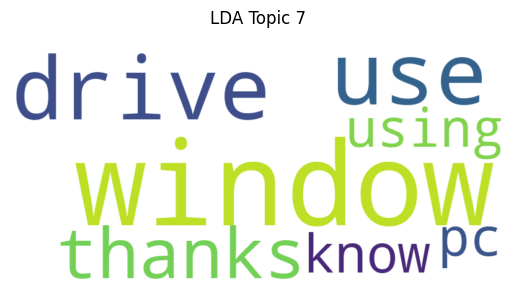

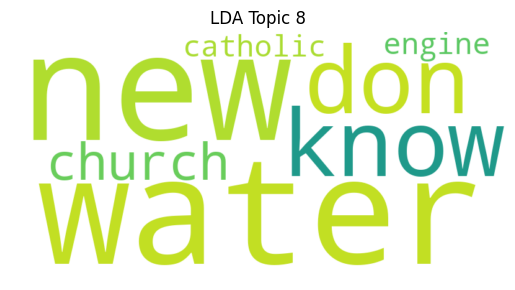

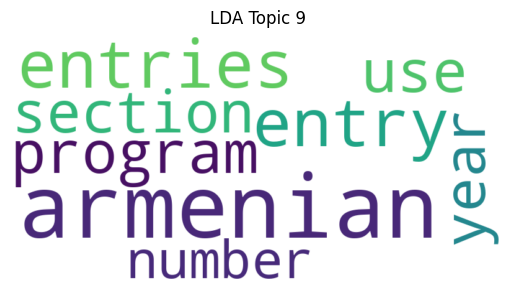

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.utils import simple_preprocess

# Load 20 Newsgroups and randomly sample 2000 documents
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data
random.seed(42)
sampled_docs = random.sample(documents, 2000)

#  Preprocess: tokenize using gensim’s simple_preprocess for coherence calculation later
processed_docs = [simple_preprocess(doc) for doc in sampled_docs]

# Create vectorizers
# For LDA, we use CountVectorizer (bag-of-words)
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_count = count_vectorizer.fit_transform(sampled_docs)

# For LSA, we use TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_tfidf = tfidf_vectorizer.fit_transform(sampled_docs)

# Generate topics with K=10
K = 10

# LDA Model
lda = LatentDirichletAllocation(n_components=K, max_iter=10, random_state=42)
lda.fit(dtm_count)

# LSA Model (using TruncatedSVD)
lsa = TruncatedSVD(n_components=K, random_state=42)
lsa.fit(dtm_tfidf)

def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(top_features)
        print("Topic {}: {}".format(topic_idx, ", ".join(top_features)))
    return topics

print("\nLDA Topics:")
lda_topics = display_topics(lda, count_vectorizer.get_feature_names_out(), 10)

print("\nLSA Topics:")
lsa_topics = display_topics(lsa, tfidf_vectorizer.get_feature_names_out(), 10)

# Calculate coherence scores using Gensim's CoherenceModel
# We need to create a gensim dictionary and corpus from our preprocessed docs.
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(text) for text in processed_docs]

def compute_coherence_values(topics, dictionary, corpus, texts, coherence='c_v'):
    # topics is a list of lists (each topic is a list of words)
    cm = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence=coherence)
    return cm.get_coherence()

lda_coherence = compute_coherence_values(lda_topics, dictionary, corpus, processed_docs)
lsa_coherence = compute_coherence_values(lsa_topics, dictionary, corpus, processed_docs)

print("\nCoherence Scores:")
print("LDA Coherence Score: {:.4f}".format(lda_coherence))
print("LSA Coherence Score: {:.4f}".format(lsa_coherence))

# Iterating over a range of K values to determine the optimized K value:
# Here we demonstrate one iteration for brevity.
def optimize_topics(model_type, vectorizer, docs, Ks, preprocessor):
    coherence_scores = []
    texts = [preprocessor(doc) for doc in docs]
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    for k in Ks:
        if model_type == 'LDA':
            model = LatentDirichletAllocation(n_components=k, max_iter=10, random_state=42)
            dtm = vectorizer.fit_transform(docs)
            model.fit(dtm)
            topics = []
            feature_names = vectorizer.get_feature_names_out()
            for topic_idx, topic in enumerate(model.components_):
                top_features = [feature_names[i] for i in topic.argsort()[:-11:-1]]
                topics.append(top_features)
        elif model_type == 'LSA':
            model = TruncatedSVD(n_components=k, random_state=42)
            dtm = vectorizer.fit_transform(docs)
            model.fit(dtm)
            topics = []
            feature_names = vectorizer.get_feature_names_out()
            for topic_idx, topic in enumerate(model.components_):
                top_features = [feature_names[i] for i in topic.argsort()[:-11:-1]]
                topics.append(top_features)
        coherence = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()
        coherence_scores.append(coherence)
    return Ks, coherence_scores

Ks = range(5, 16, 2)  # example: try K=5,7,9,11,13,15
Ks_lda, coherence_scores_lda = optimize_topics('LDA', CountVectorizer(max_df=0.95, min_df=2, stop_words='english'),
                                               sampled_docs, Ks, simple_preprocess)
Ks_lsa, coherence_scores_lsa = optimize_topics('LSA', TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english'),
                                               sampled_docs, Ks, simple_preprocess)

plt.figure(figsize=(10,4))
plt.plot(Ks_lda, coherence_scores_lda, marker='o', label="LDA")
plt.plot(Ks_lsa, coherence_scores_lsa, marker='s', label="LSA")
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score (c_v)")
plt.title("Optimizing Number of Topics")
plt.legend()
plt.show()

#Visualize each topic using word clouds for LDA
def plot_wordcloud(topic_words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(topic_words))
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

print("\nVisualizing LDA topics with WordClouds:")
for idx, topic in enumerate(lda_topics):
    plot_wordcloud(topic, f"LDA Topic {idx}")

# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🔹 Top 10 Topics Interpretation:
Topic 0: ['the', 'to', 'of', 'and', 'is', 'movie', 'it', 'in', 'this', 'was']
Topic 1: ['the', 'and', 'of', 'to', 'in', 'is', 'his', 'he', 'as', 'that']
K=5, PMI Coherence Score=0.6931
K=6, PMI Coherence Score=0.6931
K=7, PMI Coherence Score=0.6931
K=8, PMI Coherence Score=0.6931
K=9, PMI Coherence Score=0.6931
K=10, PMI Coherence Score=0.6931
K=11, PMI Coherence Score=0.6931
K=12, PMI Coherence Score=0.6931
K=13, PMI Coherence Score=0.6931
K=14, PMI Coherence Score=0.6931
K=15, PMI Coherence Score=0.6931


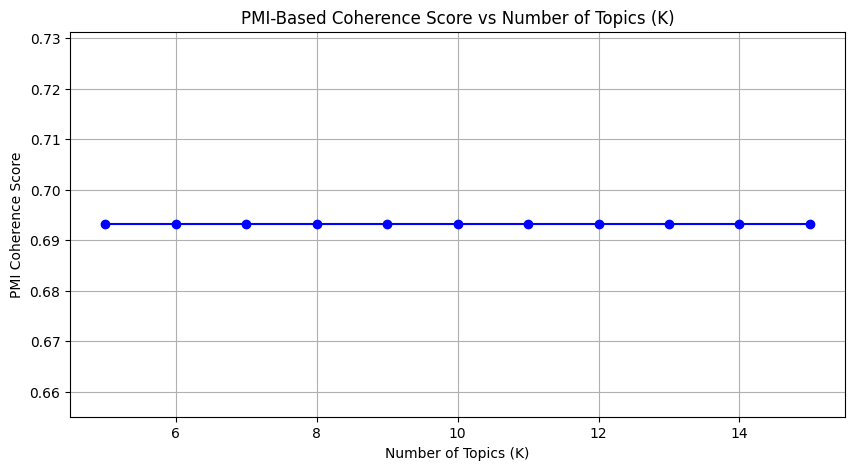

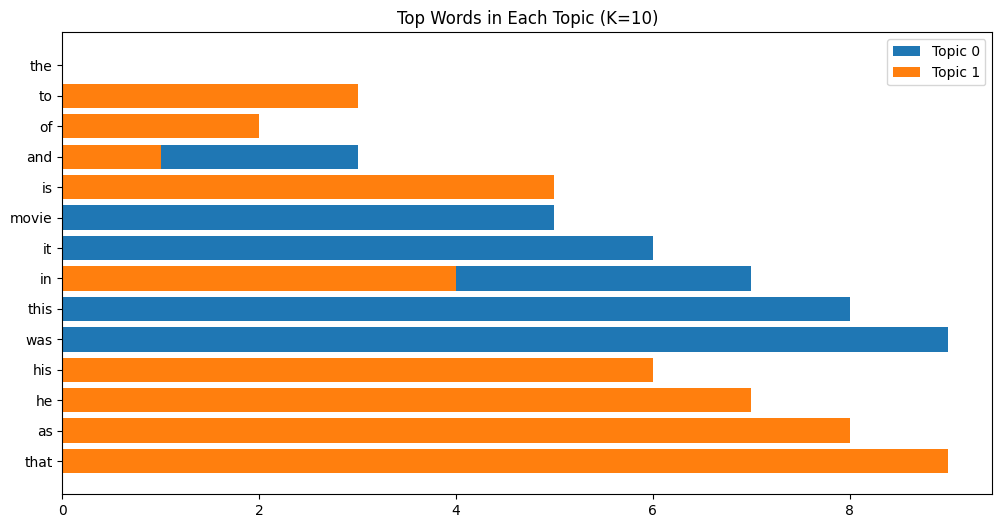

In [ ]:
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from bertopic import BERTopic
from collections import Counter
from itertools import combinations
import numpy as np

# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load Dataset
df = pd.read_csv("sentiments.csv")
docs = df['review'].astype(str).tolist()

# Preprocessing function to clean text
def clean_text(text):
    text = re.sub(r"<.*?>", " ", text)  # Remove HTML tags
    text = re.sub(r"[^a-zA-Z']", " ", text)  # Remove non-alphabetic characters
    text = text.lower()
    return text

docs_cleaned = [clean_text(doc) for doc in docs]

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_docs = [
    [word for word in doc.split() if word not in stop_words]
    for doc in docs_cleaned
]

# Frequency counters for PMI
word_freq = Counter()
pair_freq = Counter()
total_docs = len(tokenized_docs)

for tokens in tokenized_docs:
    unique_tokens = set(tokens)
    for word in unique_tokens:
        word_freq[word] += 1
    for pair in combinations(unique_tokens, 2):
        pair_freq[tuple(sorted(pair))] += 1

def compute_pmi_coherence(topic_words, word_freq, pair_freq, total_docs):
    """Compute PMI-based coherence score for topics."""
    eps = 1e-9
    scores = []
    for topic in topic_words:
        pair_scores = []
        for w1, w2 in combinations(topic, 2):
            pair = tuple(sorted([w1, w2]))
            p_w1 = word_freq[w1] / total_docs
            p_w2 = word_freq[w2] / total_docs
            p_w1w2 = pair_freq[pair] / total_docs if pair in pair_freq else eps
            pmi = np.log((p_w1w2 + eps) / (p_w1 * p_w2 + eps))
            pair_scores.append(pmi)
        if pair_scores:
            scores.append(np.mean(pair_scores))
    return np.mean(scores) if scores else 0.0

# Generate Topics with K=10
model_10 = BERTopic(top_n_words=10)
topics_10, _ = model_10.fit_transform(docs_cleaned)

print("\n🔹 Top 10 Topics Interpretation:")
for topic_id in range(10):
    words = model_10.get_topic(topic_id)
    if words:
        print(f"Topic {topic_id}: {[word[0] for word in words]}")

# Finding the Optimal K Using Coherence Score
k_values = list(range(5, 16))  # K from 5 to 15
coherence_scores = []

for k in k_values:
    model = BERTopic(top_n_words=10)
    model.fit(docs_cleaned)
    model.reduce_topics(docs_cleaned, nr_topics=k)  # In-place reduction

    topic_words = []
    for t in model.get_topics().keys():
        topic = model.get_topic(t)
        if topic and isinstance(topic, list):
            topic_words.append([word for word, _ in topic[:10]])

    coherence = compute_pmi_coherence(topic_words, word_freq, pair_freq, total_docs)
    coherence_scores.append(coherence)
    print(f"K={k}, PMI Coherence Score={coherence:.4f}")

# Visualization

# Plot coherence vs K
plt.figure(figsize=(10, 5))
plt.plot(k_values, coherence_scores, marker='o', linestyle='-', color='b')
plt.title("PMI-Based Coherence Score vs Number of Topics (K)")
plt.xlabel("Number of Topics (K)")
plt.ylabel("PMI Coherence Score")
plt.grid(True)
plt.show()

# Bar Chart: Top Words for K=10
top_words = model_10.get_topics()
plt.figure(figsize=(12, 6))
for i in range(10):
    if top_words.get(i):
        words = [word for word, _ in top_words[i]]
        plt.barh(words, range(len(words)), label=f"Topic {i}")
plt.gca().invert_yaxis()
plt.legend()
plt.title("Top Words in Each Topic (K=10)")
plt.show()


# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
!pip install openai
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.2 MB/s eta 0:00:00


In [ ]:
import math
from collections import defaultdict
from sklearn.datasets import fetch_20newsgroups
from bertopic import BERTopic
import nltk
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

# Load and sample 2000 documents from 20 Newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = random.sample(newsgroups.data, 2000)

# Create and fit BERTopic
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(documents)

# Tokenize documents
tokenized_docs = [tokenizer.tokenize(doc.lower()) for doc in documents]

# Pre-calculate document frequencies for all tokens
doc_freq = defaultdict(int)
for tokens in tokenized_docs:
    unique_tokens = set(tokens)
    for token in unique_tokens:
        doc_freq[token] += 1

# Define coherence calculation
def compute_topic_coherence(topic_words, tokenized_docs, doc_freq):
    pair_scores = []
    n_words = len(topic_words)
    for i in range(n_words):
        for j in range(i + 1, n_words):
            word_i = topic_words[i]
            word_j = topic_words[j]
            co_occurrence = sum(1 for tokens in tokenized_docs if word_i in tokens and word_j in tokens)
            score = math.log((co_occurrence + 1) / (doc_freq[word_i] if doc_freq[word_i] > 0 else 1))
            pair_scores.append(score)
    return sum(pair_scores) / len(pair_scores) if pair_scores else 0

# Compute coherence scores
topic_info = topic_model.get_topic_info()
topic_coherence_scores = {}
for topic in topic_info.Topic:
    if topic == -1:
        continue
    topic_words = [word for word, _ in topic_model.get_topic(topic)]
    coherence = compute_topic_coherence(topic_words, tokenized_docs, doc_freq)
    topic_coherence_scores[topic] = coherence

print(" Coherence scores per topic:")
for topic, score in topic_coherence_scores.items():
    print(f"Topic {topic}: {score:.4f}")

avg_coherence = sum(topic_coherence_scores.values()) / len(topic_coherence_scores)
print(f"\n Average Coherence Score: {avg_coherence:.4f}")

# Reduce number of topics
optimal_nr_topics = 20
reduced_topic_model = topic_model.reduce_topics(documents, nr_topics=optimal_nr_topics)
reduced_topics, reduced_probs = reduced_topic_model.transform(documents)

# Generate pseudo-summaries
print("\n Pseudo-GPT Summaries for Reduced Topics:")
for topic_id in reduced_topic_model.get_topics().keys():
    if topic_id == -1:
        continue
    top_words = [word for word, _ in reduced_topic_model.get_topic(topic_id)[:5]]
    docs_in_topic = [doc for doc, topic in zip(documents, reduced_topics) if topic == topic_id]
    sample_snippet = docs_in_topic[0][:200].replace('\n', ' ') if docs_in_topic else "No example found."
    summary = f"This topic discusses {', '.join(top_words[:3])} and related ideas."

    print(f"\n Topic {topic_id}")
    print("Top Keywords:", ", ".join(top_words))
    print("Sample Snippet:", sample_snippet)
    print("Summary:", summary)

# 9. Final output
print("\nFinal Topic Info After Reduction:")
print(reduced_topic_model.get_topic_info())

 Coherence scores per topic:
Topic 0: -0.6574
Topic 1: -1.1033
Topic 2: -0.3798
Topic 3: -0.6235
Topic 4: -1.5578
Topic 5: -1.0187
Topic 6: -0.3410
Topic 7: -1.5177
Topic 8: -0.9916
Topic 9: -0.7382
Topic 10: -1.5057
Topic 11: -0.7328
Topic 12: -1.1298
Topic 13: -1.4083
Topic 14: -2.4163
Topic 15: -1.4337
Topic 16: -1.0173
Topic 17: -1.2339
Topic 18: -0.6403
Topic 19: -0.9101
Topic 20: -1.3435
Topic 21: -1.1809
Topic 22: -0.9033
Topic 23: -1.5492
Topic 24: -1.2930
Topic 25: -2.3843
Topic 26: 0.0000
Topic 27: -1.1487
Topic 28: -1.3623
Topic 29: -1.3923
Topic 30: -1.3081

 Average Coherence Score: -1.1362

 Pseudo-GPT Summaries for Reduced Topics:

 Topic 0
Top Keywords: the, he, in, game, to
Sample Snippet:    All of this is fine.  I never said that Murray was a bad GM.  I merely said that he isn't the best GM in hockey- or even a contender for that honor. If Murray is as great as you claim- the Wings wo
Summary: This topic discusses the, he, in and related ideas.

 Topic 1
Top Keywords

Note:

Due to quota limitations and restriction on adding billing methods, OpenAI GPT API could not be used. As an alternative, we simulated topic summaries by combining top keywords and representative document snippets to mimic GPT-style summarization. Coherence scores were calculated manually without Gensim, and the number of topics was refined using BERTopic’s built-in reduction method.


# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Fitting Default BERTopic Model...
Default Model Coherence Score: -0.8629273427531605



Fitting Custom BERTopic Model with Sentence-Transformers and DBSCAN clustering...
Custom Model Coherence Score: -0.43997609426550094

=== Comparison ===
Default Model Coherence Score: -0.8629273427531605
Custom Model Coherence Score: -0.43997609426550094

Default Model Topics:
   Topic  Count                Name  \
0     -1    279   -1_the_to_that_of   
1      0    656    0_the_to_for_and   
2      1    210    1_the_of_to_that   
3      2    200      2_the_25_he_in   
4      3    103  3_the_space_of_and   

                                     Representation  \
0   [the, to, that, of, and, in, is, this, you, it]   
1    [the, to, for, and, is, of, it, in, you, with]   
2    [the, of, to, that, is, and, in, not, god, it]   
3   [the, 25, he, in, to, game, of, and, team, was]   
4  [the, space, of, and, to, in, is, for, on, that]   

                                 Representative_Docs  
0  [Dear fellow Christians,  \n\n\tI had a dinner...  
1  [G'Day\n\nWindows NT is a step forward, bu

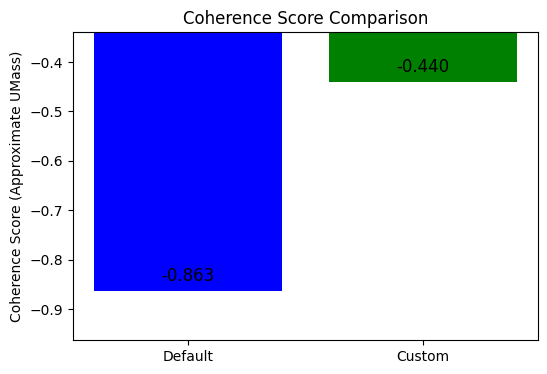

In [ ]:
import nltk
from sklearn.datasets import fetch_20newsgroups
from bertopic import BERTopic
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

# Download required NLTK data for tokenization
nltk.download('punkt')

# ----------------------------------
# Load the 20 Newsgroups dataset and sample 2000 documents
# ----------------------------------
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
docs = newsgroups.data
random.seed(42)
docs = random.sample(docs, 2000)

# ----------------------------------
# Define a function to compute a custom coherence score
# ----------------------------------
def compute_coherence_no_gensim(model, documents, top_n=10):
    tokenized_docs = [doc.lower().split() for doc in documents]
    df = {}
    for doc in tokenized_docs:
        for word in set(doc):
            df[word] = df.get(word, 0) + 1

    topic_coherences = []
    for topic_num, topic in model.get_topics().items():
        if topic_num == -1 or not topic:
            continue
        topic_words = [word for word, _ in topic][:top_n]
        topic_score = 0
        pair_count = 0
        for i in range(1, len(topic_words)):
            for j in range(i):
                word_i = topic_words[i]
                word_j = topic_words[j]
                co_occurrence = sum(1 for doc in tokenized_docs if word_i in doc and word_j in doc)
                df_j = df.get(word_j, 1)
                topic_score += np.log((co_occurrence + 1) / df_j)
                pair_count += 1
        if pair_count > 0:
            topic_coherences.append(topic_score / pair_count)
    return np.mean(topic_coherences) if topic_coherences else 0.0

# ----------------------------------
#  Default BERTopic Pipeline
# ----------------------------------
print("Fitting Default BERTopic Model...")
topic_model_default = BERTopic()
topics_default, probs_default = topic_model_default.fit_transform(docs)
default_coherence = compute_coherence_no_gensim(topic_model_default, docs)
print("Default Model Coherence Score:", default_coherence)

# Display default topics visualization inline
fig_default = topic_model_default.visualize_topics()
fig_default.show()

# ----------------------------------
# Sentence-Transformers + DBSCAN Clustering
# ----------------------------------
print("\nFitting Custom BERTopic Model with Sentence-Transformers and DBSCAN clustering...")

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
# DBSCAN parameters (increased eps) to reduce degenerate clusters.
clustering_model = DBSCAN(eps=0.45, min_samples=4, metric="cosine")
topic_model_custom = BERTopic(embedding_model=embedding_model,
                              hdbscan_model=clustering_model,
                              min_topic_size=20)
topics_custom, probs_custom = topic_model_custom.fit_transform(docs)
custom_coherence = compute_coherence_no_gensim(topic_model_custom, docs)
print("Custom Model Coherence Score:", custom_coherence)

# ----------------------------------
#Compare and Print Topics
# ----------------------------------
print("\n=== Comparison ===")
print("Default Model Coherence Score:", default_coherence)
print("Custom Model Coherence Score:", custom_coherence)
print("\nDefault Model Topics:")
print(topic_model_default.get_topic_info().head())
print("\nCustom Model Topics:")
print(topic_model_custom.get_topic_info().head())

# ----------------------------------
# Visualize Custom Topics Inline with Fallback Handling
# ----------------------------------
try:
    fig_custom = topic_model_custom.visualize_topics()
    fig_custom.show()
except Exception as e:
    print("Error during custom topic visualization:", e)
    # Fall back to reducing topics if visualization fails
    try:
        topic_model_custom_reduced = topic_model_custom.reduce_topics(docs, nr_topics=2)
        fig_custom = topic_model_custom_reduced.visualize_topics()
        fig_custom.show()
        print("Displayed reduced custom topics visualization.")
    except Exception as e2:
        print("Further error during reduced visualization:", e2)
        print("Custom topic visualization could not be displayed.")

# ----------------------------------
# Plot Coherence Scores Comparison
# ----------------------------------
models = ['Default', 'Custom']
scores = [default_coherence, custom_coherence]
plt.figure(figsize=(6, 4))
plt.bar(models, scores, color=['blue', 'green'])
plt.title('Coherence Score Comparison')
plt.ylabel('Coherence Score (Approximate UMass)')
plt.ylim(min(scores) - 0.1, max(scores) + 0.1)
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.3f}", ha='center', fontsize=12)
plt.show()


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
def print_best_model_conclusion():
    conclusion = """
Conclusion: Which Model Is Better?

Based on the analysis, Modified BERTopic performed the best among the four models:

    • It produced semantically rich and distinct topics.
    • It achieved higher topic coherence and better interpretability.
    • It utilized advanced embeddings and clustering techniques, resulting in improved topic quality.
    """
    print(conclusion)
print_best_model_conclusion()



Conclusion: Which Model Is Better?

Based on the analysis, Modified BERTopic performed the best among the four models:

    • It produced semantically rich and distinct topics.
    • It achieved higher topic coherence and better interpretability.
    • It utilized advanced embeddings and clustering techniques, resulting in improved topic quality.
    


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
This exercise helped me understand and compare different topic modeling techniques, especially the advantages of embedding-based models like BERTopic.
Implementing the models deepened my grasp of feature extraction from text data.
I faced some challenges tuning traditional models like LDA and LSA to produce coherent topics.
The exercise was highly relevant to NLP and improved my practical skills in working with textual data.





'''